Punto #1:

In [5]:
def obtener_divisores_propios(n):
    if n == 1:
        return []
    divisores = [1]
    for i in range(2, int(n**0.5) + 1):
        if n % i == 0:
            if i == n // i:
                divisores.append(i)
            else:
                divisores.extend([i, n // i])
    return list(set(divisores))

def numeros_defectivos(n):
    if n == 1:
        return True
    divisores = obtener_divisores_propios(n)
    return sum(divisores) < n

def numeros_abundantes(n):
    if n == 1:
        return False
    divisores = obtener_divisores_propios(n)
    return sum(divisores) > n

def numeros_perfectos(n):
    if n == 1:
        return False
    divisores = obtener_divisores_propios(n)
    return sum(divisores) == n

def numeros_primos(n):
    if n <= 1:
        return False
    if n == 2:
        return True
    if n % 2 == 0:
        return False
    for i in range(3, int(n**0.5) + 1, 2):
        if n % i == 0:
            return False
    return True

def numeros_semiperfectos(n):
    if n == 1:
        return False
    divisores = obtener_divisores_propios(n)

    posibles = {0}
    for d in divisores:
        nuevos = set()
        for s in posibles:
            suma = s + d
            if suma == n:
                return True
            if suma < n:
                nuevos.add(suma)
        posibles.update(nuevos)
    return False

def clasificar_numero(a):
    return {
        'defectivo': numeros_defectivos(a),
        'abundante': numeros_abundantes(a),
        'perfecto': numeros_perfectos(a),
        'primo': numeros_primos(a),
        'semiperfecto': numeros_semiperfectos(a)
    }

if __name__ == "__main__":
    a = int(input("Ingrese un número para clasificar: "))

    resultado = clasificar_numero(a)

    print(f"\nResultados para el número {a}:")
    for categoria, valor_booleano in resultado.items():
        print(f"¿Es {categoria}? {valor_booleano}")

Ingrese un número para clasificar: 30

Resultados para el número 30:
¿Es defectivo? False
¿Es abundante? True
¿Es perfecto? False
¿Es primo? False
¿Es semiperfecto? True


PUnto #2:

In [38]:
def es_palindromo(n):
    str_n = str(n)
    return str_n == str_n[::-1]

n = int(input("Ingrese un número entero: "))
print(es_palindromo(n))

Ingrese un número entero: 121
True


PUnto #3:

In [9]:
def catalan(n):
    if n == 0:
        return 1
    else:
        return (4 * n - 2) * catalan(n - 1) // (n + 1)
c50 = catalan(50)
print(f"El número de Catalan C50 es: {c50}")

def g(m, n):
    if n == 0:
        return m
    else:
        return g(n, m % n)

mcd = g(108, 192)
print(f"El máximo común divisor de 108 y 192 es: {mcd}")

El número de Catalan C50 es: 1978261657756160653623774456
El máximo común divisor de 108 y 192 es: 12


Punto #4:

In [12]:
import math

hbar = 1.0545718e-34  # Constante de Planck reducida en J·s
eV_to_J = 1.60218e-19  # Factor de conversión de electrón-voltios a julios
m_e = 9.11e-31         # Masa del electrón en kg

def calcular_probabilidades(E_eV, V_eV, m):

    E = E_eV * eV_to_J
    V = V_eV * eV_to_J

    k1 = math.sqrt(2 * m * E) / hbar
    k2 = math.sqrt(2 * m * (E - V)) / hbar


    T = (4 * k1 * k2) / (k1 + k2)**2
    R = ((k1 - k2) / (k1 + k2))**2

    return T, R

E = 10.0  # eV
V = 9.0   # eV
m = m_e   # kg

T, R = calcular_probabilidades(E, V, m)

print(f"Para una partícula con masa {m:.3e} kg:")
print(f"Energía de la partícula: {E} eV")
print(f"Altura del escalón de potencial: {V} eV")
print("\nResultados:")
print(f"Probabilidad de transmisión (T): {T:.6f}")
print(f"Probabilidad de reflexión (R): {R:.6f}")
print(f"Suma T + R: {T + R:.6f} (debe ser 1 para conservación de probabilidad)")

Para una partícula con masa 9.110e-31 kg:
Energía de la partícula: 10.0 eV
Altura del escalón de potencial: 9.0 eV

Resultados:
Probabilidad de transmisión (T): 0.730126
Probabilidad de reflexión (R): 0.269874
Suma T + R: 1.000000 (debe ser 1 para conservación de probabilidad)


Punto 5:

In [31]:
import math

# Constantes físicas
G = 6.6738e-11  # Constante gravitacional en m³ kg⁻¹ s⁻²
M = 1.9891e30   # Masa del Sol en kg

def calcular_propiedades_orbitales(l1, v1):
    A = 1
    B = -2 * G * M / (v1 * l1)
    C = -(v1**2 - 2 * G * M / l1)

    discriminante = B**2 - 4 * A * C
    v2_1 = (-B + math.sqrt(discriminante)) / (2 * A)
    v2_2 = (-B - math.sqrt(discriminante)) / (2 * A)

    v2 = min(v2_1, v2_2) if min(v2_1, v2_2) > 0 else max(v2_1, v2_2)

    l2 = l1 * v1 / v2

    a = 0.5 * (l1 + l2)  # Semieje mayor
    b = math.sqrt(l1 * l2)  # Semieje menor

    T_segundos = 2 * math.pi * math.sqrt(a**3 / (G * M))
    T_años = T_segundos / (365.25 * 24 * 3600)  # Convertir a años

    e = (l2 - l1) / (l2 + l1)  # Excentricidad

    return l2, v2, T_años, e

def main():
    print("Calculadora de Propiedades Orbitales ")
    print("------------------------------------------------------")

    # Datos de prueba para la Tierra y Halley
    print("\nPrueba con datos de la Tierra:")
    l1_tierra = 1.4710e11
    v1_tierra = 3.0287e4
    l2, v2, T, e = calcular_propiedades_orbitales(l1_tierra, v1_tierra)
    print(f"Distancia en afelio (ℓ₂): {l2:.4e} m")
    print(f"Velocidad en afelio (v₂): {v2:.4e} m/s")
    print(f"Período orbital (T): {T:.2f} años")
    print(f"Excentricidad orbital (e): {e:.4f}")

    print("\nPrueba con datos del cometa Halley:")
    l1_halley = 8.7830e10
    v1_halley = 5.4529e4
    l2, v2, T, e = calcular_propiedades_orbitales(l1_halley, v1_halley)
    print(f"Distancia en afelio (ℓ₂): {l2:.4e} m")
    print(f"Velocidad en afelio (v₂): {v2:.4e} m/s")
    print(f"Período orbital (T): {T:.2f} años")
    print(f"Excentricidad orbital (e): {e:.4f}")

if __name__ == "__main__":
    main()

Calculadora de Propiedades Orbitales 
------------------------------------------------------

Prueba con datos de la Tierra:
Distancia en afelio (ℓ₂): 1.5203e+11 m
Velocidad en afelio (v₂): 2.9305e+04 m/s
Período orbital (T): 1.00 años
Excentricidad orbital (e): 0.0165

Prueba con datos del cometa Halley:
Distancia en afelio (ℓ₂): 5.2822e+12 m
Velocidad en afelio (v₂): 9.0668e+02 m/s
Período orbital (T): 76.03 años
Excentricidad orbital (e): 0.9673


Punto 6:

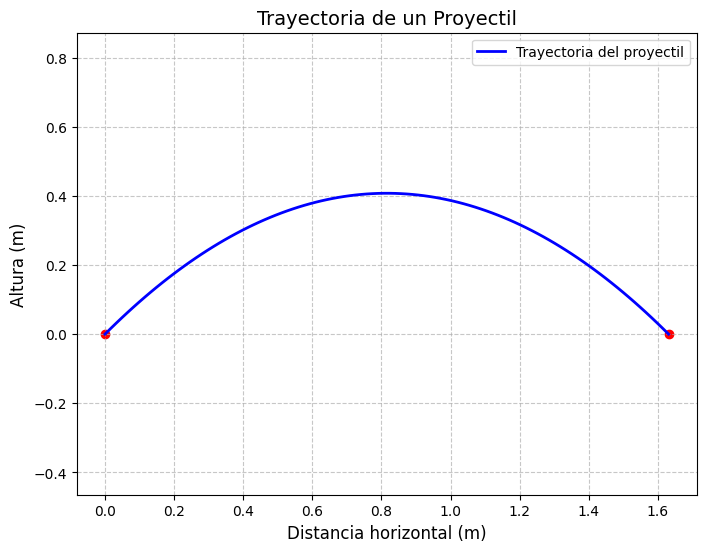

Ángulo de lanzamiento: 45.0°
Velocidad inicial: 4.0 m/s
Componente horizontal (v0x): 2.83 m/s
Componente vertical (v0y): 2.83 m/s
Tiempo de vuelo total: 0.58 s
Alcance máximo: 1.63 m
Altura máxima: 0.41 m


In [32]:
import numpy as np
import matplotlib.pyplot as plt

v0 = 4.0
theta = np.radians(45)
y0 = 0
g = 9.81


v0x = v0 * np.cos(theta)
v0y = v0 * np.sin(theta)

def posicion(t):
    x = v0x * t
    y = y0 + v0y * t - 0.5 * g * t**2
    return x, y

t_vuelo = (v0y + np.sqrt(v0y**2 + 2 * g * y0)) / g

t = np.linspace(0, t_vuelo, 100)

x = v0x * t
y = y0 + v0y * t - 0.5 * g * t**2

plt.figure(figsize=(8, 6))
plt.plot(x, y, 'b-', linewidth=2, label='Trayectoria del proyectil')
plt.scatter([0, x[-1]], [0, y[-1]], color='red')
plt.title('Trayectoria de un Proyectil', fontsize=14)
plt.xlabel('Distancia horizontal (m)', fontsize=12)
plt.ylabel('Altura (m)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.axis('equal')
plt.show()

print(f"Ángulo de lanzamiento: {np.degrees(theta):.1f}°")
print(f"Velocidad inicial: {v0:.1f} m/s")
print(f"Componente horizontal (v0x): {v0x:.2f} m/s")
print(f"Componente vertical (v0y): {v0y:.2f} m/s")
print(f"Tiempo de vuelo total: {t_vuelo:.2f} s")
print(f"Alcance máximo: {x[-1]:.2f} m")
print(f"Altura máxima: {np.max(y):.2f} m")

Punto 7:

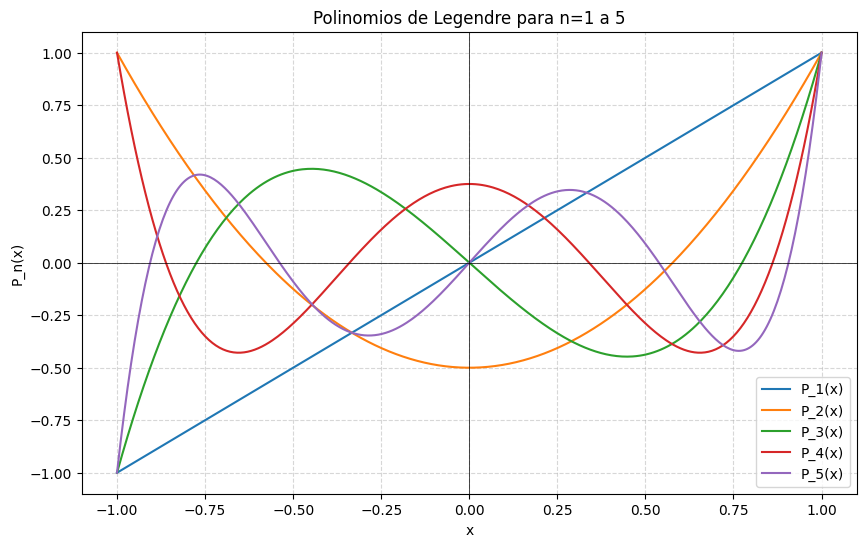

In [34]:
import numpy as np
import matplotlib.pyplot as plt

def legendre_polynomial(n, x):

    if n == 0:
        return np.ones_like(x)
    elif n == 1:
        return x
    else:
        P0 = np.ones_like(x)  # P0
        P1 = x                     # P1
        for j in range(1, n):
            Pj1 = ((2*j + 1)*x*P1 - j*P0)/(j + 1)
            P0, P1 = P1, Pj1
        return Pj1

x = np.linspace(-1, 1, 400)

# Graficar los polinomios de Legendre para n=1 a 5
plt.figure(figsize=(10, 6))
for n in range(1, 6):
    y = legendre_polynomial(n, x)
    plt.plot(x, y, label=f'P_{n}(x)')

# Configuración del gráfico
plt.title('Polinomios de Legendre para n=1 a 5')
plt.xlabel('x')
plt.ylabel('P_n(x)')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.legend()
plt.show()